# Objective of Analysis
- LendingClub is a platform that connects borrowers and investors.
- Borrowers are required to give their personal, professional and purpose of loan requirement.
- LendingClub then pulls the credit history of the loan applicant, audits the profile and either approves or rejects the application.
- Investors can browse through various approved loan applications and invest in them - for which, they will be shared the profits.
- Like any credit business, LendingClub faces loss because of the defaulted loans.
- Our objective is to perform __Exploratory Data Analysis__ on the give data and identify the top 5 drivers that can be used to predict potential defaulters.

# Understanding Data
- A dataset that contains loan application details, credit profile of loan application along with actual status of the loan repayment is provided.
- There are a total of 111 columns.
- Out of the 111 columns, there are 54 columns that has no data.
- There is no column that gives the information of FICO score for each loan applicant directly.
- __Dataset has nominal categorical, ordinal categorical and numeric variables.__
- __Dataset has input variables - which are filled by the loan applicant and output variables - which are possibly filled by LendingClub from various sources or after analysis.__

# Exploratory Data Analysis Strategy
- Load the given dataset
- Identify the columns that has all missing values and drop them.
- Identify the columns that has a single value across all its rows and drop them.
- Date columns, if required, can be used to derive month and year.
- String columns that has numeric data can be converted to int/float.
- If required, create a new numeric column for ordinal categorical columns - for ease of analysis.
- (Optional) Since we are not performing any text analysis, drop nominal categorical columns, unless they provide relevant information.
- Perform __Univariate Analysis__ on all numeric columns using box, violin and dist plots.
- Performn __Univariate Analysis__ on all ordinal categorical columns using pivot table, crosstab and frequency distributions.
- Based upon univariate analysis results, drop the columns that will not be useful for further analysis.
- Filter the data that is required for further analysis.
- Remove outliers from each column of our remaining dataset.
- Impute or drop the rows that has missing values.
- Perform __Correlation Analysis__.
- Remove columns that has high correlation and that deem redundant.
- Perform __Bivariate Analysis__ on a combination of columns until we identify the top 5 columns/variables that can be used to predict potential defaultors.

### Import libraries and data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
loans = pd.read_csv('./loan.csv', low_memory=False)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Functions - Data Manipulation

### 1. Get all columns that doesn't have any data

In [3]:
def get_na_cols(df):
    cols = []
    for col in df.columns:
        if(df[col].isnull().sum() == len(df)):
            cols.append(col)
    return cols

### 2. Drop a given list of columns

In [4]:
def drop_cols(df, cols):
    df = df.drop(columns=cols)
    return df

### 3. Get data by column value

In [5]:
def get_by_col_value(df, col, col_value):
    return df.loc[df[col] == col_value]

### 4. Drop rows with missing values in columns

In [6]:
def drop_na_rows_in_cols(df, cols):
    return df.dropna(subset=cols)

### 5. Get all numerical columns in a dataset

In [7]:
def get_all_num_cols(df):
    return list(df.dtypes[df.dtypes != "object"].index)

### 6. Get all object columns in a dataset

In [8]:
def get_all_obj_columns(df):
    return list(df.dtypes[df.dtypes == "object"].index)

### 7. Get numeric value for grade

In [9]:
# Function to map grade to numerical value
def get_num_grade(grade):
    return {
        'A': 1,
        'B': 2,
        'C': 3,
        'D': 4,
        'E': 5,
        'F': 6,
        'G': 7
    }[grade]

### 8. Get numeric value for employee (experience) length

In [10]:
def get_num_emp_length(exp):
    return {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
    }[exp]

### 9. Get numeric value for home ownership

In [11]:
def get_num_home_ownership(own):
    return {
        'RENT': 1,
        'OWN': 2,
        'MORTGAGE': 3,
        'OTHER': 4,
        'NONE': 5
    }[own]

### 10. Get numeric value for verification status

In [12]:
def get_num_verification_status(sts):
    return {
        'Verified': 1,
        'Source Verified': 2,
        'Not Verified': 3
    }[sts]

## Functions - Plot Data

### 1. Plot a frequency distribution of a column

In [13]:
def plot_col_freq_dist(df, col, title):
    df[col].value_counts().plot.bar()
    plt.title(title)
    plt.show()

### 2. Plot a correlation matrix of all numerical columns against a target column

In [14]:
def plot_corr_matrix(df, nr_c, targ):
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

### 3. Plot box plots of all numerical columns in a dataset

In [15]:
def plot_box(df, cols, nr_rows, nr_cols):
    j = 0

    fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

    for r in range(0,nr_rows):
        for c in range(0,nr_cols):  
            i = r*nr_cols+c
            if i < len(cols):
                sns.boxplot(df[cols[j]], data=df, ax = axs[r][c], orient='v')
                j = j+1

    plt.tight_layout()    
    plt.show()

### 4. Plot violin plots of all numerical columns in a dataset

In [16]:
def plot_violin(df, cols, nr_rows, nr_cols):
    j = 0

    fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

    for r in range(0,nr_rows):
        for c in range(0,nr_cols):  
            i = r*nr_cols+c
            if i < len(cols):
                sns.violinplot(df[cols[j]], data=df, ax = axs[r][c], orient='v')
                j = j+1

    plt.tight_layout()    
    plt.show()

### 5. Plot distribution plots of all numerical columns in a dataset

In [17]:
def plot_dist(df, cols, nr_rows, nr_cols):
    j = 0

    fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

    for r in range(0,nr_rows):
        for c in range(0,nr_cols):  
            i = r*nr_cols+c
            if i < len(cols):
                sns.distplot(df[cols[j]], ax = axs[r][c])
                j = j+1

    plt.tight_layout()    
    plt.show()

### 6. Plot box plot for multiple variables

In [18]:
def plot_box_multi_var(data, x, y, hue, title, w_size, l_size):
    plt.figure(figsize=(w_size,l_size))
    ax = sns.boxplot(data=data, x=x, y=y, hue=hue, palette="Set3")
    plt.title(title)
    plt.show()

### 7. Plot crosstab bar plot

In [19]:
def plot_crosstab_bar(col1, col2, title, w_size, l_size):
    plt.figure(figsize=(w_size,l_size))
    pd.crosstab(col1, col2).plot.bar()
    plt.title(title)
    plt.show()

### 8. Plot crosstab bar plot over fraction|

In [20]:
def plot_crosstab_frc_bar(col1, col2, title, w_size, l_size):
    plt.figure(figsize=(w_size,l_size))
    pd.crosstab(col1, col2).apply(lambda row: row/row.sum()).plot.bar()
    plt.title(title)
    plt.show()

In [21]:
# Get the list of columns that has all missing values
na_cols = get_na_cols(loans)

In [22]:
# Drop the columns that has all missing values
loans = drop_cols(loans, na_cols)

In [23]:
# Print all columns with their respective data types
loans.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [24]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

# Exploratory Data Analysis

In [25]:
# Check for unique values
loans['acc_now_delinq'].unique()

array([0], dtype=int64)

In [26]:
# Check if there is only a single value and nan
loans['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [27]:
# Identify columns that are not useful for analysis
loans['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

__dti__ is ratio of debt to income. The highest value is ~30% which means 70% of annual income of the member is intact. Usually, if a member has dti < 40%, that member can be eligible for getting a loan. Hence, we can drop this column

In [28]:
# Check if there are multiple rows with same member_id
len(loans.loc[loans['member_id'].duplicated() == True])

0

In [29]:
# Check if there are multiple rows with same id
len(loans.loc[loans['id'].duplicated() == True])

0

member_id and id are unique across the dataset and this means that __no two rows are associated with each other__.

### Identifying the list of columns that can be dropped
- A column that has a single value across all its rows will not be useful for our analysis. Below are the list of such columns:
    - pymnt_plan - has only 'n'
    - initial_list_status - has only 'f'
    - application_type - has only 'INDIVIDUAL'
    - acc_now_delinq - has only 0
    - delinq_amnt - has only 0
    - policy_code - has only 1
- A column that has a single value along with missing values will not be useful for our analysis. Below are the list of such columns:
    - chargeoff_within_12_mths - has only 0 and nan
    - collections_12_mths_ex_med - has only 0 and nan
    - tax_liens - has only 0 and nan
    - next_pymnt_d - has only 2 values Jun/Jul 16 and > 98% nan
- Nominal categorical variables that has random values are not useful for our analysis. Below are the list of such columns:
    - url - Everything is same except the member_id.
    - desc - Random description in which few of them contain text from purpose.
    - zip_code - Masked. Also, we have addr_state column if we need geographical grouping.
    - member_id - Random
    - id - Random
    - title - Random. Can get uniform information from purpose column than this.
    - emp_title - Random
- Output Columns that are not useful for analysis. Below are the list of such columns:
    - total_rec_int
    - total_pymnt_inv
    - funded_amnt_inv
    - last_pymnt_d
    - last_credit_pull_d
- Columns that have more than 30% of missing values. Below are the list of such columns:
    - mths_since_last_record - mths_since_last_record has >95% missing values.
- Columns that are redundant. Below are the list of such columns:
    - mths_since_last_delinq - Since we have delinq_2yrs, we can drop mths_since_last_delinq as it is redundant and also, there are >50% missing values
    - sub_grade - Since we already have grade column, we can drop this.
- Other columns that are not useful for analysis. Below are the list of such columns:
    - dti - Dropping dti column as our max dti is <30% and this is considered not very risky
    - revol_bal
    - out_prncp
    - out_prncp_inv
    - total_rec_prncp
    - total_rec_late_fee
    - last_pymnt_amnt

In [30]:
# Prepare list of columns that has same value across all its rows
cols_with_same_value = []
cols_with_same_value.extend(['pymnt_plan', 'initial_list_status', 'application_type', 'acc_now_delinq', 'delinq_amnt'])
cols_with_same_value.extend(['chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'policy_code', 'tax_liens'])
cols_with_same_value.extend(['next_pymnt_d'])

# Drop
loans = drop_cols(loans, cols_with_same_value)

In [31]:
# Prepare list of nominal categorical columns
cols_nominal_categorical = []
cols_nominal_categorical.extend(['url', 'desc', 'zip_code', 'member_id', 'id', 'title', 'emp_title'])

# Drop
loans = drop_cols(loans, cols_nominal_categorical)

In [32]:
# Prepare list of output columns that are not useful for analysis
cols_output = []
cols_output.extend(['total_rec_int', 'total_pymnt_inv', 'funded_amnt_inv', 'last_pymnt_d', 'last_credit_pull_d'])

# Drop
loans = drop_cols(loans, cols_output)

In [33]:
# Prepare list of columns that has > 30% missing values
cols_higher_na = []
cols_higher_na.extend(['mths_since_last_record'])

# Drop
loans = drop_cols(loans, cols_higher_na)

In [34]:
# Prepare list of redundant columns
cols_redundant = []
cols_redundant.extend(['mths_since_last_delinq', 'sub_grade'])

# Drop
loans = drop_cols(loans, cols_redundant)

In [35]:
# Prepare list of columns that are not useful for our analysis
cols_not_useful = []
cols_not_useful.extend(['dti', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'last_pymnt_amnt'])

# Drop
loans = drop_cols(loans, cols_not_useful)

In [36]:
len(loans.columns)

25

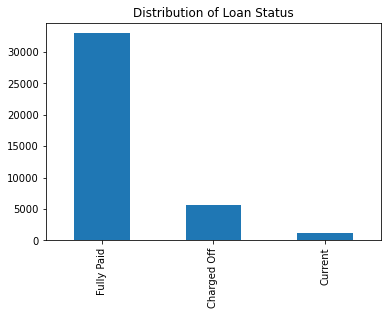

In [37]:
# Print a frequency distribution of sum of records based upon loan_status
plot_col_freq_dist(loans, 'loan_status', 'Distribution of Loan Status')

__From above plot, it is evident that there ~83% of data is related to Fully Paid, ~2.8% of data is related to Current and ~14.2% of data is related to Charged Off loan status__.

## Prepare dataset for further analysis
- Since the purpose of analysis is to identify the drivers that can predict potential loan defaulters, filter all the give data to have only the Charged Off loan status for further analysis

In [38]:
# Get Charged Off loans for further analysis
loans_defaulted = get_by_col_value(loans, 'loan_status', 'Charged Off')
print('Length of dataset for further analysis is : ', len(loans_defaulted))
loans_defaulted.head()

Length of dataset for further analysis is :  5627


,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,recoveries,collection_recovery_fee,pub_rec_bankruptcies
1,2500,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,Apr-99,5,3,0,9.40%,4,1008.71,117.08,1.1100,0.0
8,5600,5600,60 months,21.28%,152.39,F,4 years,OWN,40000.0,Source Verified,...,Apr-04,2,11,0,32.60%,13,646.02,189.06,2.0900,0.0
9,5375,5375,60 months,12.69%,121.45,B,< 1 year,RENT,15000.0,Verified,...,Sep-04,0,2,0,36.50%,3,1476.19,269.29,2.5200,0.0
12,9000,9000,36 months,13.49%,305.38,C,< 1 year,RENT,30000.0,Source Verified,...,Apr-04,1,4,0,91.70%,9,2270.70,444.30,4.1600,0.0
14,10000,10000,36 months,10.65%,325.74,B,3 years,RENT,100000.0,Source Verified,...,May-91,2,14,0,55.50%,29,7471.99,645.10,6.3145,0.0


## Treating missing values:
- Since each variable of given dataset is populated either by user input, by a financial function or from a public source and since the highest no. of missing values in a row is < 4% of the overall filtered data, we can remove them instead of imputing them with mean or median or mode as it may skew the data

In [39]:
loans_defaulted.isnull().sum()

loan_amnt                    0
funded_amnt                  0
term                         0
int_rate                     0
installment                  0
grade                        0
emp_length                 228
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_util                  16
total_acc                    0
total_pymnt                  0
recoveries                   0
collection_recovery_fee      0
pub_rec_bankruptcies       118
dtype: int64

In [40]:
loans_defaulted = drop_na_rows_in_cols(loans_defaulted, ['emp_length', 'revol_util', 'pub_rec_bankruptcies'])

In [41]:
len(loans_defaulted)

5266

In [42]:
loans_defaulted.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                 0
total_acc                  0
total_pymnt                0
recoveries                 0
collection_recovery_fee    0
pub_rec_bankruptcies       0
dtype: int64

## Data Manipulation
- Extract month and year from date columns
- Convert percentage string columns to float columns
- __Create numerical columns for ordinal categorical columns__

In [43]:
# Create a numerical column from grade column
loans_defaulted['grade_num'] = loans_defaulted['grade'].apply(lambda x: get_num_grade(x))

# Create a numerical column from emp_length column
loans_defaulted['emp_length_num'] = loans_defaulted['emp_length'].apply(lambda x: get_num_emp_length(x))

# Create a numerical column from home_ownership
loans_defaulted['home_ownership_num'] = loans_defaulted['home_ownership'].apply(lambda x: get_num_home_ownership(x))

# Create a numerical column from verification_status
loans_defaulted['verification_status_num'] = loans_defaulted['verification_status'].apply(lambda x: get_num_verification_status(x))

In [44]:
# Convert date columns from string to datetime64
loans_defaulted['issue_d'] = loans_defaulted['issue_d'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))
loans_defaulted['earliest_cr_line'] = loans_defaulted['earliest_cr_line'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))

In [45]:
# Extract month and year from issue_d date column
loans_defaulted['issue_d_month'] = loans_defaulted['issue_d'].apply(lambda x: datetime.datetime.strftime(x, '%b'))
loans_defaulted['issue_d_year'] = loans_defaulted['issue_d'].apply(lambda x: int(datetime.datetime.strftime(x, '%Y')))

# Extract month and year from earliest_cr_line date column
loans_defaulted['earliest_cr_line_month'] = loans_defaulted['earliest_cr_line'].apply(lambda x: datetime.datetime.strftime(x, '%b'))
loans_defaulted['earliest_cr_line_year'] = loans_defaulted['earliest_cr_line'].apply(lambda x: int(datetime.datetime.strftime(x, '%Y')))

Dropping issue_d and earliest_cr_line columns as they are redundant after extracting all required information

In [46]:
# Drop issue_d and issue_d columns that are redundant
loans_defaulted = drop_cols(loans_defaulted, ['issue_d', 'earliest_cr_line'])

In [47]:
# Convert int_rate to float from string
loans_defaulted['int_rate'] = loans_defaulted['int_rate'].apply(lambda x: float(x.replace('%', '')))

# Convert revol_util from object to float64
loans_defaulted['revol_util'] = loans_defaulted['revol_util'].apply(lambda x: float(x.replace('%', '')))

# Convert term to int from string
loans_defaulted['term_num'] = loans_defaulted['term'].apply(lambda x: int(x.replace(' months', '')))

In [48]:
len(loans_defaulted.columns)

32

In [49]:
# Get the list of all numerical columns
li_num_cols = get_all_num_cols(loans_defaulted)

# Get the list of all categorical columns
li_cat_cols = get_all_obj_columns(loans_defaulted)

In [50]:
print(len(li_num_cols))
print(len(li_cat_cols))

22
10


# Univariate Analysis - Numerical Variables
- Plot Box, Violin and Dist plots
- Remove outliers
    - Use quantile method to get values from 1, 2, 3 sigma away from mean
    - Remove the outliers

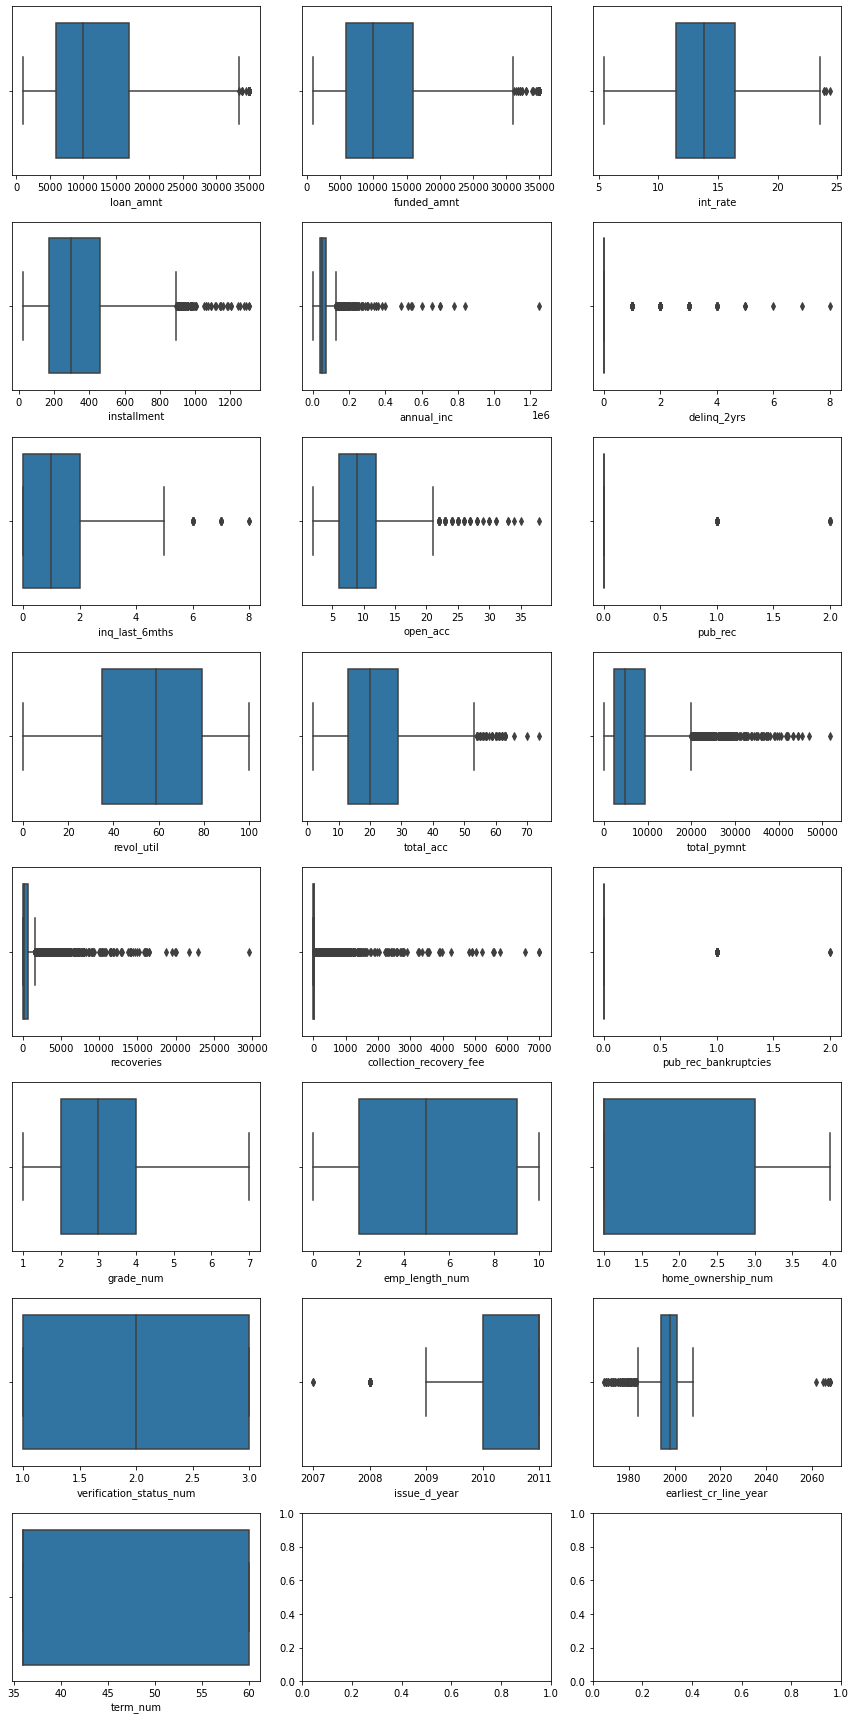

In [51]:
# Plot Box
plot_box(loans_defaulted, li_num_cols, 8, 3)

### Remove Outliers
- annual_inc - taking all the values in 3 sigma quantile
- loan_amnt - taking all the values in 2 sigma quantile
- Though there are outliers in other columns, we will deal with them only when we face an issue during further analysis

In [52]:
# Annual Income
q = loans_defaulted['annual_inc'].quantile(0.995)
loans_defaulted = loans_defaulted.loc[loans_defaulted['annual_inc'] < q]

In [53]:
# Loan Amount
q = loans_defaulted['loan_amnt'].quantile(0.95)
loans_defaulted = loans_defaulted.loc[loans_defaulted['loan_amnt'] < q]

In [54]:
loans_defaulted['loan_amnt'].describe()

count     4977.000000
mean     11130.841873
std       6691.202934
min       1000.000000
25%       5500.000000
50%      10000.000000
75%      15250.000000
max      27600.000000
Name: loan_amnt, dtype: float64

In [55]:
loans_defaulted['int_rate'].describe()

count    4977.000000
mean       13.735385
std         3.563763
min         5.420000
25%        11.280000
50%        13.570000
75%        16.290000
max        24.400000
Name: int_rate, dtype: float64

In [56]:
loans_defaulted['annual_inc'].describe()

count      4977.000000
mean      59090.224623
std       32511.099973
min        4080.000000
25%       37000.000000
50%       52000.000000
75%       72000.000000
max      250000.000000
Name: annual_inc, dtype: float64

In [57]:
loans_defaulted['installment'].describe()

count    4977.000000
mean      312.459666
std       185.836024
min        22.790000
25%       167.730000
50%       282.090000
75%       417.850000
max       950.120000
Name: installment, dtype: float64

In [58]:
loans_defaulted['revol_util'].describe()

count    4977.000000
mean       55.854686
std        27.808847
min         0.000000
25%        34.700000
50%        58.800000
75%        79.100000
max        99.900000
Name: revol_util, dtype: float64

In [59]:
loans_defaulted['grade_num'].describe()

count    4977.000000
mean        3.177215
std         1.433809
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: grade_num, dtype: float64

In [60]:
loans_defaulted['emp_length_num'].describe()

count    4977.000000
mean        5.026723
std         3.582442
min         0.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        10.000000
Name: emp_length_num, dtype: float64

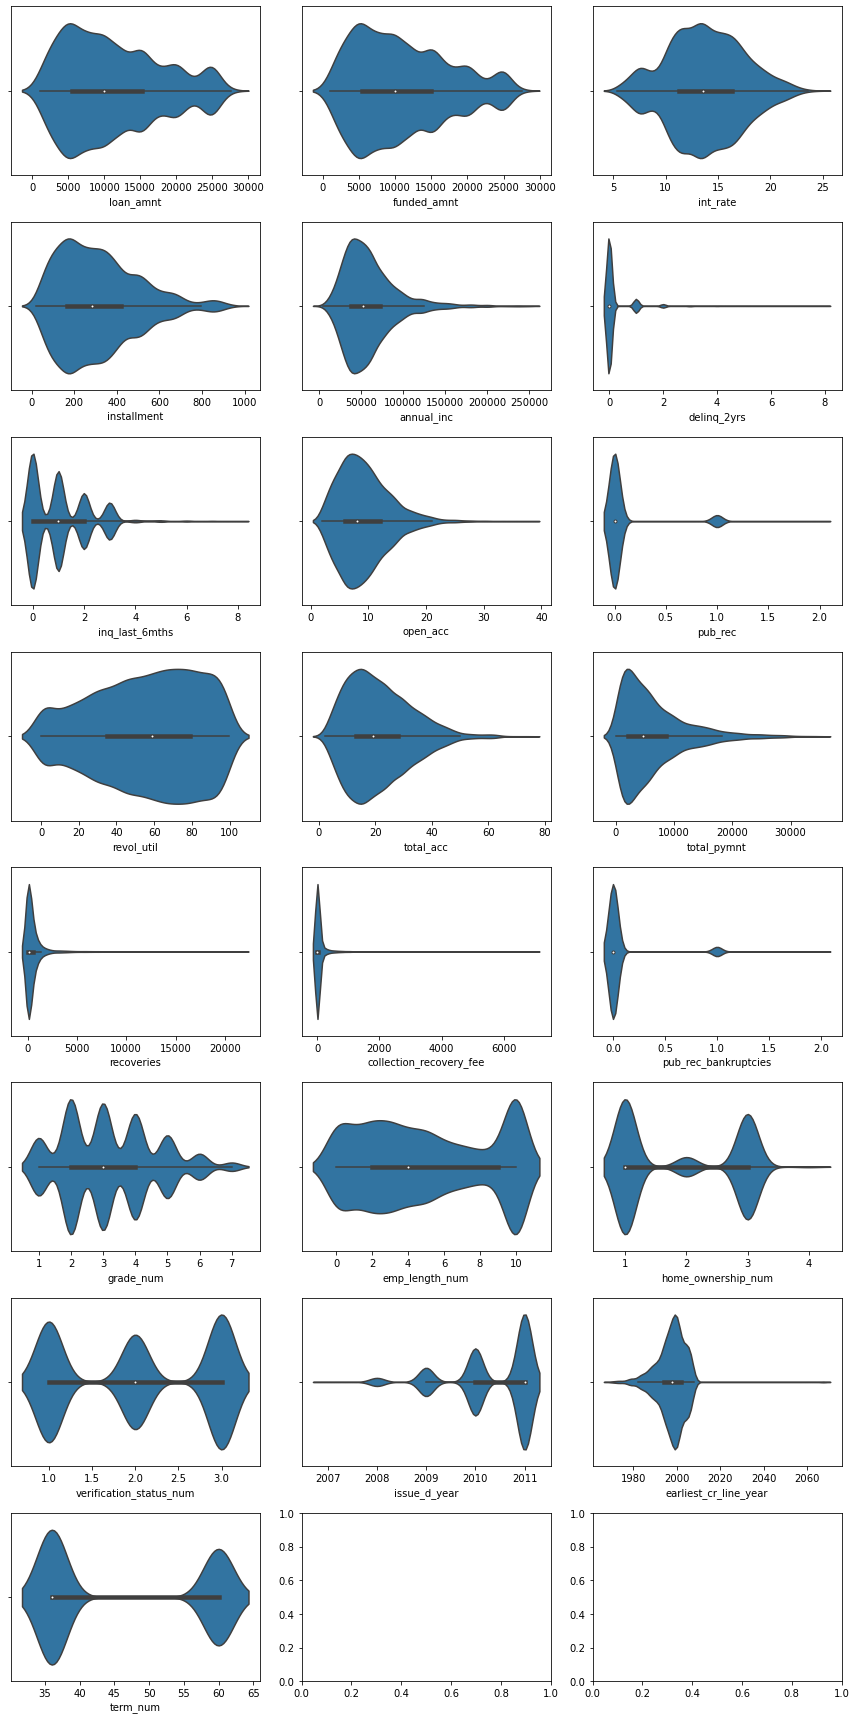

In [61]:
# Plot Violin
plot_violin(loans_defaulted, li_num_cols, 8, 3)

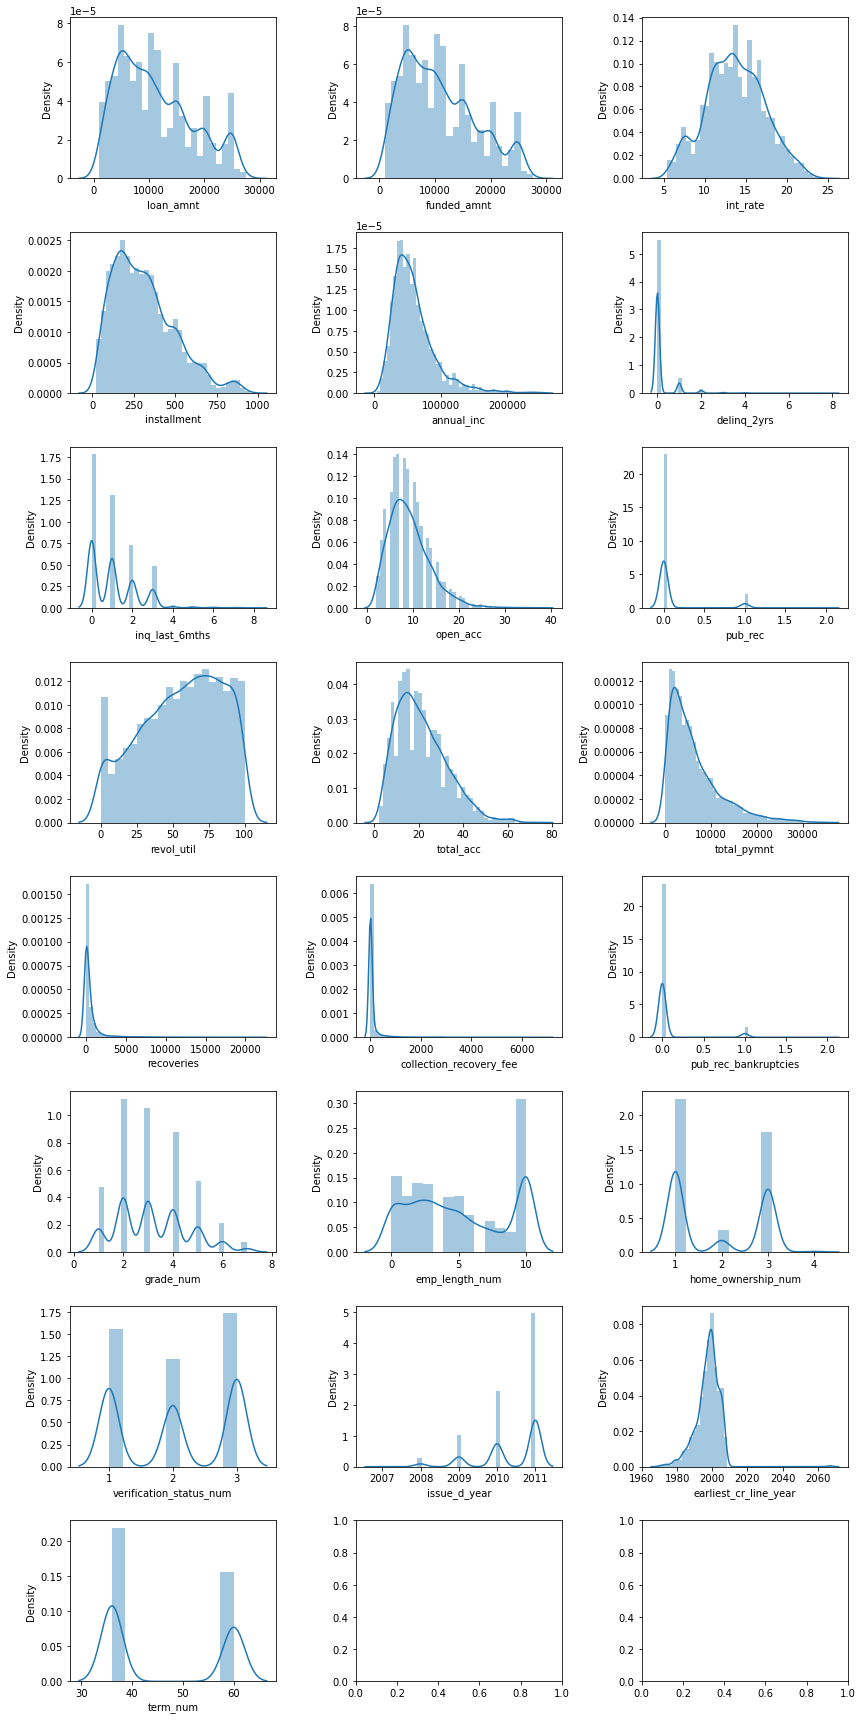

In [62]:
# Plot Dist
plot_dist(loans_defaulted, li_num_cols, 8, 3)

## Observations:
- Most of the loan amounts are in the range of 5500 to 15250 dollars
- Most of the annual incomes are in the range of 37000 to 72000 dollars
- Most of the interest rates are in the range of 11.28% to 16.29%
- Most of the instalment amounts are in the range of 167 to 417 dollars
- Most of the revolving credit utilization is in the range of 34% to 99%
- Most of the loan grades are in the range B to D
- Most of the employee length are in the range of 2 years to 9 years

# Univariate Analysis - Categorical Variables
- Plot frequency distribution against loan_status

<Figure size 720x432 with 0 Axes>

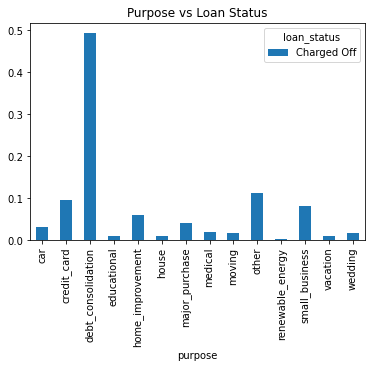

In [63]:
# Plot purpose against loan_status
plot_crosstab_frc_bar(loans_defaulted['purpose'], loans_defaulted['loan_status'], 'Purpose vs Loan Status', 10, 6)

__debt_consolidation__ purpose has highest default rate

<Figure size 720x432 with 0 Axes>

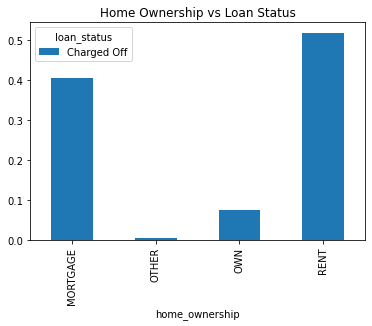

In [64]:
# Plot home_ownership against loan_status
plot_crosstab_frc_bar(loans_defaulted['home_ownership'], loans_defaulted['loan_status'], 'Home Ownership vs Loan Status', 10, 6)

Both __Rent__ and __Mortgage__ home ownerships have higher default rate

<Figure size 720x432 with 0 Axes>

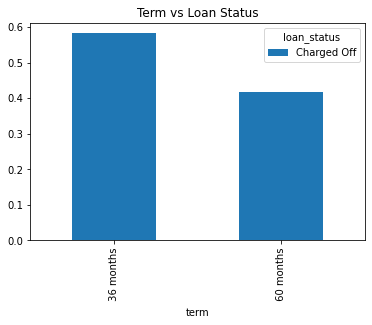

In [65]:
# Plot term against loan_status
plot_crosstab_frc_bar(loans_defaulted['term'], loans_defaulted['loan_status'], 'Term vs Loan Status', 10, 6)

__36 months (lower)__ term has higher default rates

<Figure size 720x432 with 0 Axes>

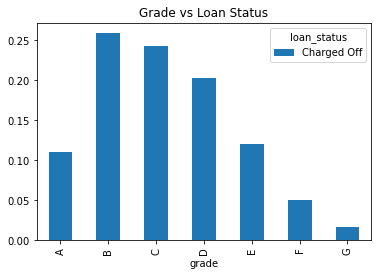

In [66]:
# Plot grade against loan_status
plot_crosstab_frc_bar(loans_defaulted['grade'], loans_defaulted['loan_status'], 'Grade vs Loan Status', 10, 6)

Interestingly, __B, C and D grade__ loans have higher default rates

<Figure size 720x432 with 0 Axes>

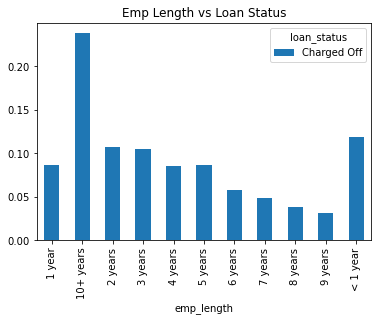

In [67]:
# Plot emp_length against loan_status
plot_crosstab_frc_bar(loans_defaulted['emp_length'], loans_defaulted['loan_status'], 'Emp Length vs Loan Status', 10, 6)

Employee length __10+ years followed by < 1 year__ have higher default rates

<Figure size 720x432 with 0 Axes>

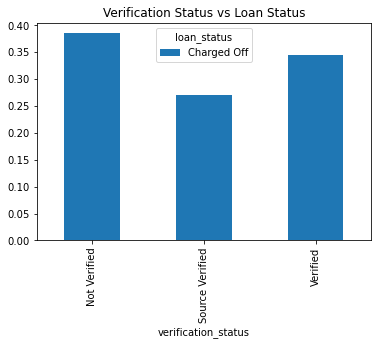

In [68]:
# Plot verification_status against loan_status
plot_crosstab_frc_bar(loans_defaulted['verification_status'], loans_defaulted['loan_status'], 'Verification Status vs Loan Status', 10, 6)

__"Not Verified" followed by "Verified"__ loans have higher default rates

<Figure size 1296x432 with 0 Axes>

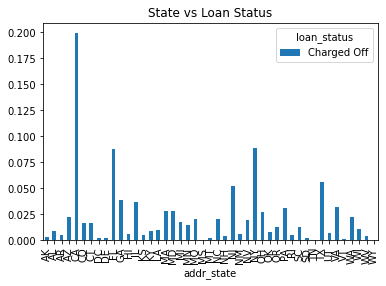

In [69]:
# Plot addr_state against loan_status
plot_crosstab_frc_bar(loans_defaulted['addr_state'], loans_defaulted['loan_status'], 'State vs Loan Status', 18, 6)

__California followed by Florida and New York__ states have higher default rates

<Figure size 720x432 with 0 Axes>

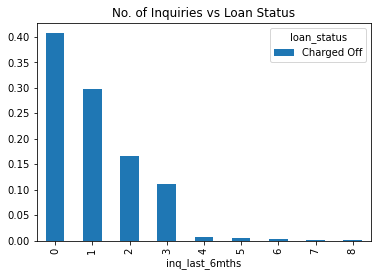

In [70]:
# Plot inq_last_6mths against loan_status
plot_crosstab_frc_bar(loans_defaulted['inq_last_6mths'], loans_defaulted['loan_status'], 'No. of Inquiries vs Loan Status', 10, 6)

Loans __without any prior inquiries__ have higher default rates

<Figure size 720x432 with 0 Axes>

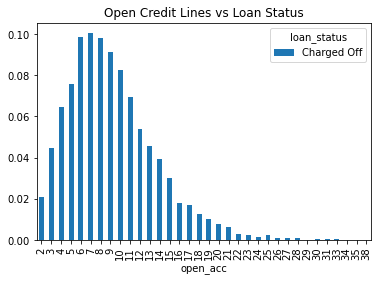

In [71]:
# Plot open_acc against loan_status
plot_crosstab_frc_bar(loans_defaulted['open_acc'], loans_defaulted['loan_status'], 'Open Credit Lines vs Loan Status', 10, 6)

Applicant having __6 to 10 open credit lines__ have higher default rates

<Figure size 720x432 with 0 Axes>

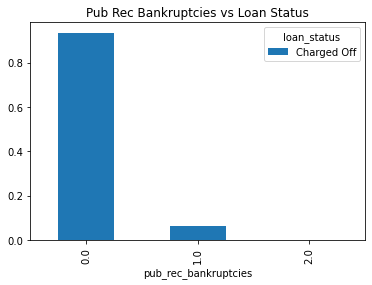

In [72]:
# Plot pub_rec_bankruptcies against loan_status
plot_crosstab_frc_bar(loans_defaulted['pub_rec_bankruptcies'], loans_defaulted['loan_status'], 'Pub Rec Bankruptcies vs Loan Status', 10, 6)

Interestingly, applicants __who don't have any public record bankruptcies__ have higher default rates

<Figure size 720x432 with 0 Axes>

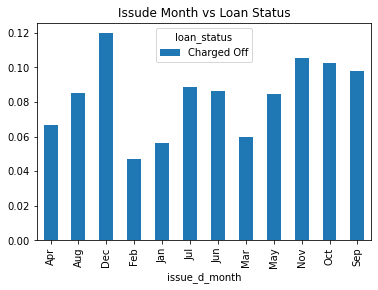

In [73]:
# Plot issue_d_month against loan_status
plot_crosstab_frc_bar(loans_defaulted['issue_d_month'], loans_defaulted['loan_status'], 'Issude Month vs Loan Status', 10, 6)

Interestingly, default rates are higher __as year goes by - that is higher in December than in January__

<Figure size 720x432 with 0 Axes>

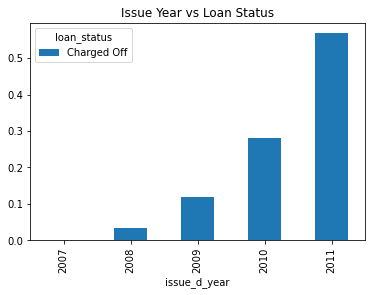

In [74]:
# Plot issue_d_year against loan_status
plot_crosstab_frc_bar(loans_defaulted['issue_d_year'], loans_defaulted['loan_status'], 'Issue Year vs Loan Status', 10, 6)

Loans issued in the year 2011 have higher default rates. Probably because large number of loan applications are approved in 2011.

<Figure size 720x432 with 0 Axes>

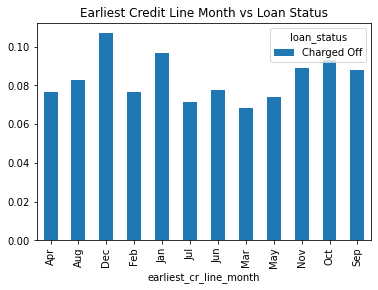

In [75]:
# Plot earliest_cr_line_month against loan_status
plot_crosstab_frc_bar(loans_defaulted['earliest_cr_line_month'], loans_defaulted['loan_status'], 'Earliest Credit Line Month vs Loan Status', 10, 6)

Almost similar patterns observed across months

<Figure size 720x432 with 0 Axes>

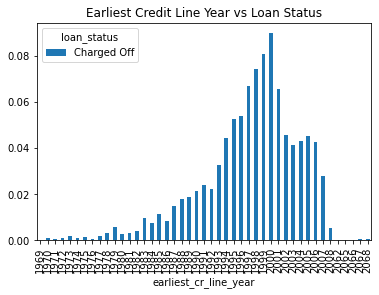

In [76]:
# Plot earliest_cr_line_year against loan_status
plot_crosstab_frc_bar(loans_defaulted['earliest_cr_line_year'], loans_defaulted['loan_status'], 'Earliest Credit Line Year vs Loan Status', 10, 6)

Applicants whose earliest credit line is __between 1998 to 2001__ have higher default rates

# Bivariate Analysis
- Plot correlations for all numerical columns
- Use only one of the highly correlated columns in a group - as using all may be redundant

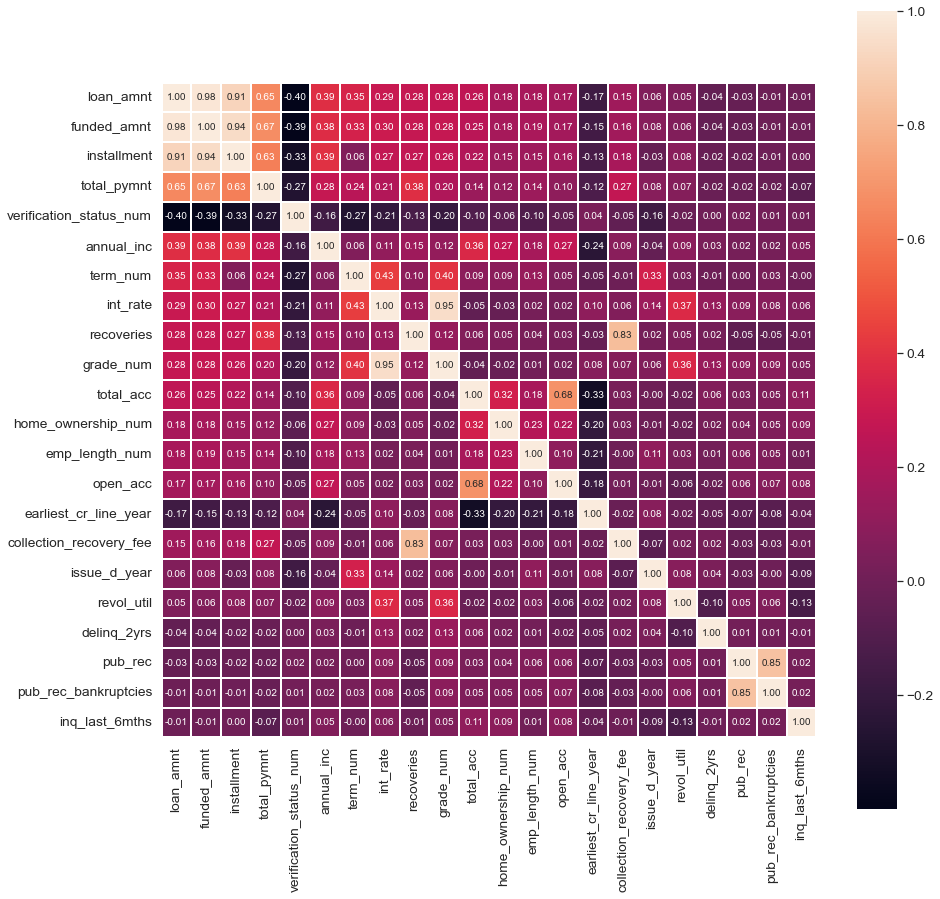

In [77]:
# Plot correlation matrix
plot_corr_matrix(loans_defaulted, len(li_num_cols), 'loan_amnt')

## From above, we can infer:
- loan_amnt, funded_amnt, installment, total_pymnt are highly correlated and only one of them can be used.
- int_rate and grade are highly correlated and only one of them can be used.
- recoveries and collection_recovery_fee are highly correlated and hence, only one of them can be used.
- pub_rec and pub_rec_bankruptcies are highly correlated and hence, only one of them can be used.
- revol_util and int_rate are slightly correlated which means that higher revol_util will have higher interest rate too.
- emp_length and int_rate are not at all correlated - which means that int_rate will be higher for people with lesser emp experience.
- open_acc and verification_status has no clear correlation with any of the columns.

In [78]:
# Remove all redundant columns that have higher correlation
loans_defaulted = drop_cols(loans_defaulted, ['funded_amnt', 'installment', 'total_pymnt', 'int_rate'])
loans_defaulted = drop_cols(loans_defaulted, ['collection_recovery_fee', 'pub_rec', 'revol_util'])

In [79]:
len(loans_defaulted.columns)

25

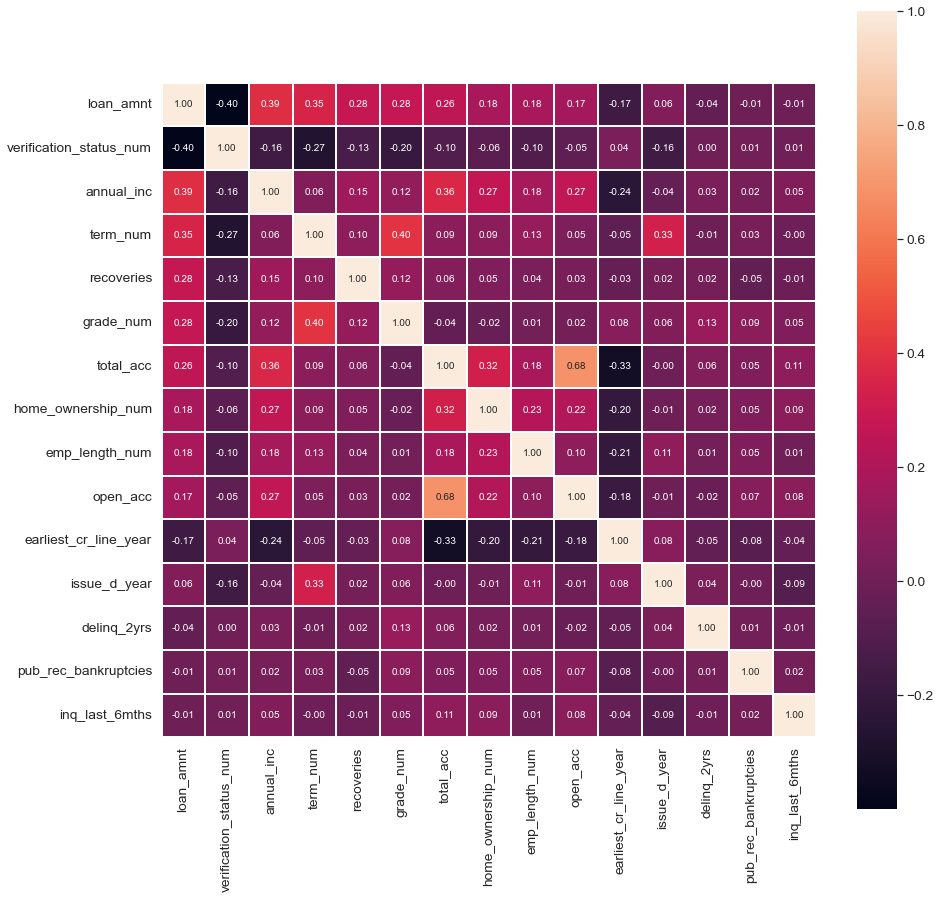

In [80]:
# Plot correlation matrix
plot_corr_matrix(loans_defaulted, len(li_num_cols), 'loan_amnt')

All above columns are not highly correlated

# Bivariate Analysis on Loan Status
- Identify relationship between 1 numerical column and 1 categorical column over loan status

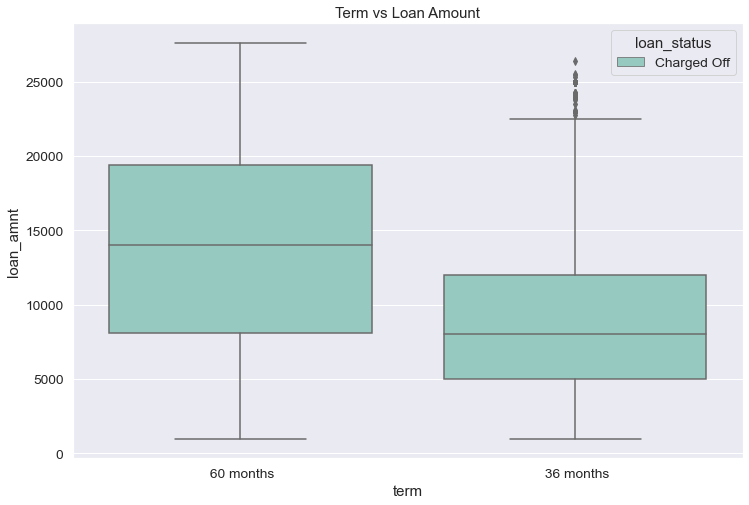

In [81]:
# Term vs Loan Amount
plot_box_multi_var(loans_defaulted, 'term', 'loan_amnt', 'loan_status', 'Term vs Loan Amount', 12, 8)

- __Higher the term, higher the risk of default__. This is contradicting to the result of univariate analysis of "term" alone
- __Observe that the defaulted loan amount range is 5000 to 19000 dollars__

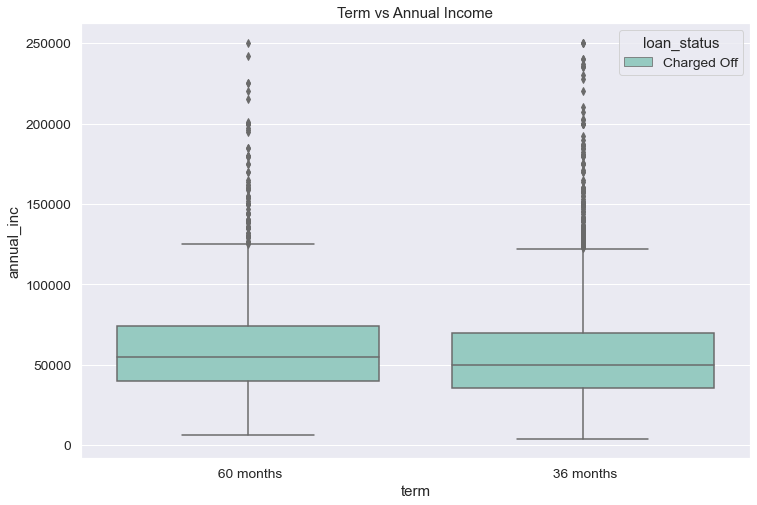

In [82]:
# Term vs Grade
plot_box_multi_var(loans_defaulted, 'term', 'annual_inc', 'loan_status', 'Term vs Annual Income', 12, 8)

- No significant difference observed with respect to term.
- __Observe that defaulted loan applicants annual income range is 30000 - 75000 dollars__

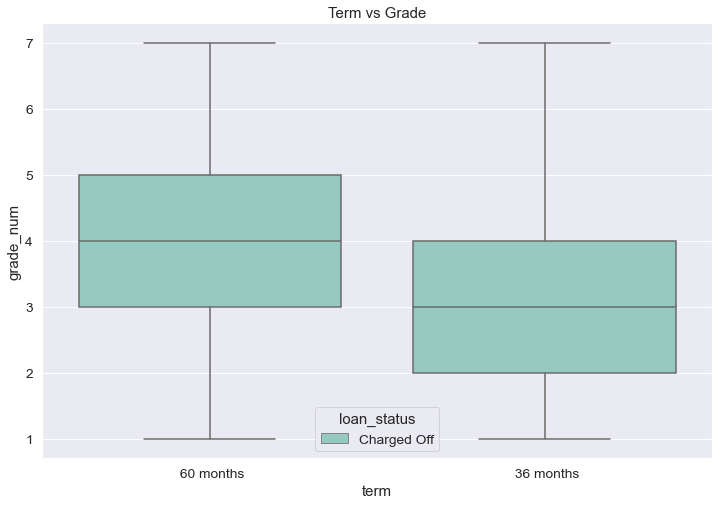

In [83]:
# Term vs Grade
plot_box_multi_var(loans_defaulted, 'term', 'grade_num', 'loan_status', 'Term vs Grade', 12, 8)

__Higher the term, higher the risk of default__.

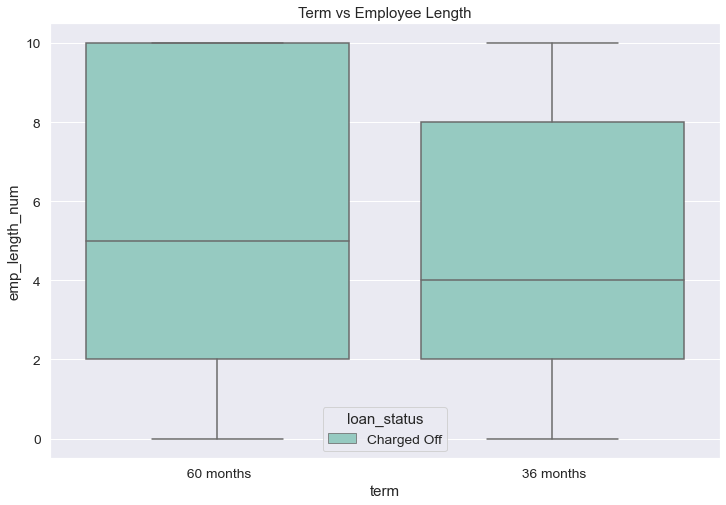

In [84]:
# Term vs Employee Length
plot_box_multi_var(loans_defaulted, 'term', 'emp_length_num', 'loan_status', 'Term vs Employee Length', 12, 8)

__Higher the term, higher the risk of default__.

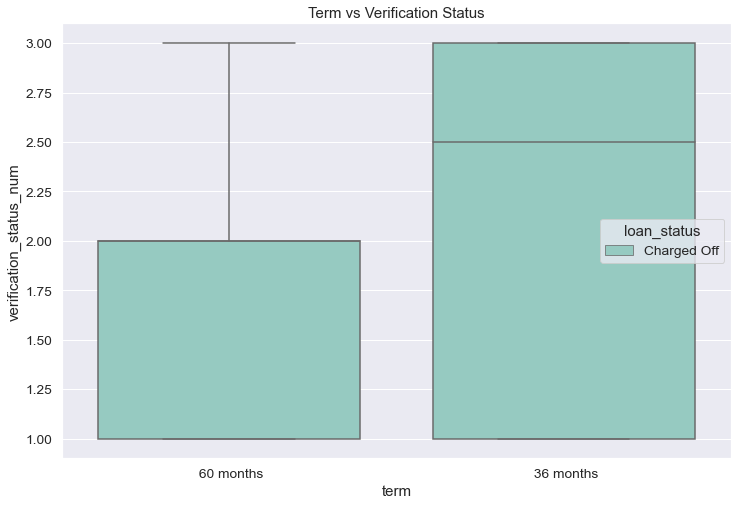

In [85]:
# Term vs Verification Status
plot_box_multi_var(loans_defaulted, 'term', 'verification_status_num', 'loan_status', 'Term vs Verification Status', 12, 8)

__Lower the term, higher the risk of default__.

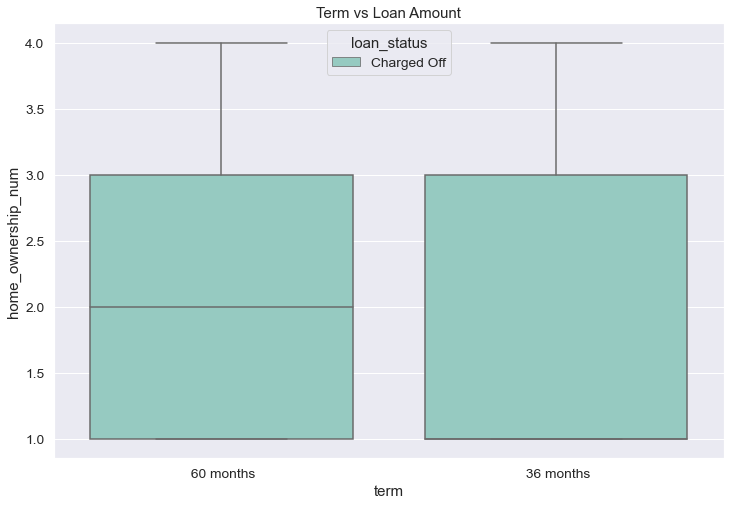

In [86]:
# Term vs Home Ownership
plot_box_multi_var(loans_defaulted, 'term', 'home_ownership_num', 'loan_status', 'Term vs Loan Amount', 12, 8)

__Higher the term, higher the risk of default if we go by the median values__.

### Observations 
- __Loan Term has an impact on sevaral other variables. Hence, this can be a potential driving factor__
- __Defaulted loan applicants annual income range is 30000 - 75000 dollars__
- __Defaulted loan amount range is 5000 to 19000 dollars__

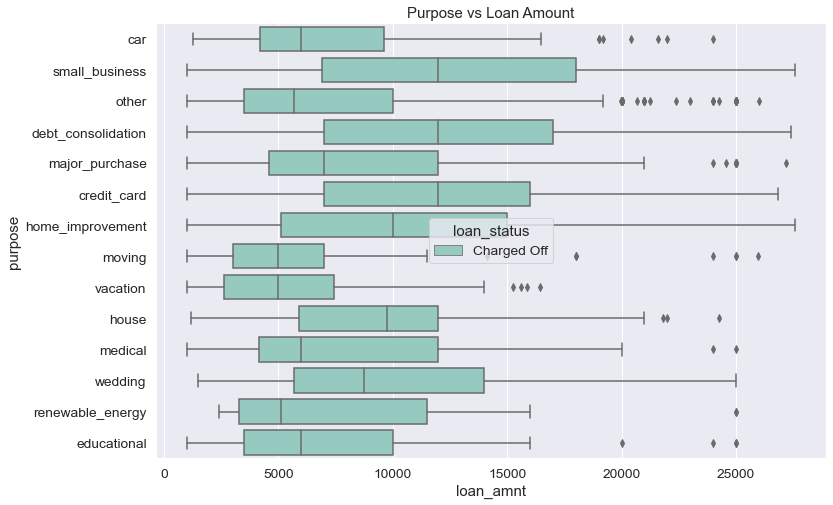

In [87]:
# Purpose vs Loan Amount
plot_box_multi_var(loans_defaulted, 'loan_amnt', 'purpose', 'loan_status', 'Purpose vs Loan Amount', 12, 8)

- __Different purposes have different risks of being default. Small Business, Debt Consolidation and Home Improvement have top default rates__
- __Observe that the defaulted loan amount range is 2500 - 18000 dollars__.

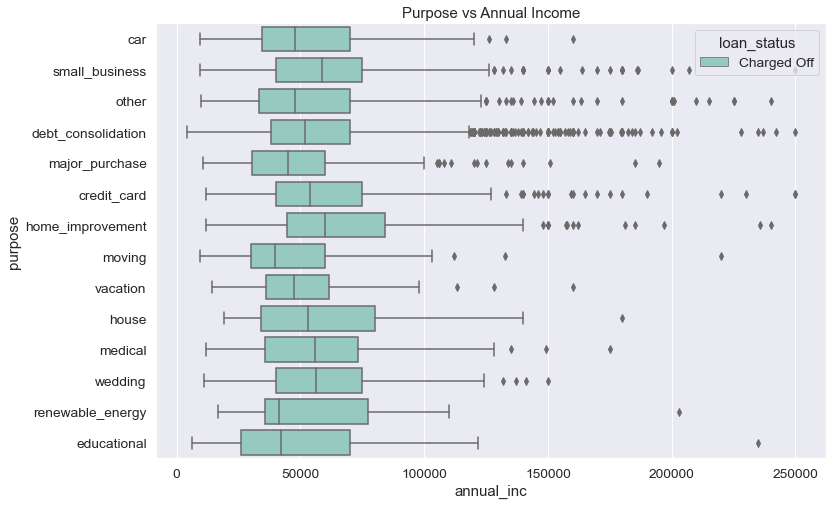

In [88]:
# Purpose vs Annual Income
plot_box_multi_var(loans_defaulted, 'annual_inc', 'purpose', 'loan_status', 'Purpose vs Annual Income', 12, 8)

- Though not very significant, different purposes have difference risks of being defaulted.
- __Observe that the defaulted loan applicants annual income range is 30000 - 80000 dollars__

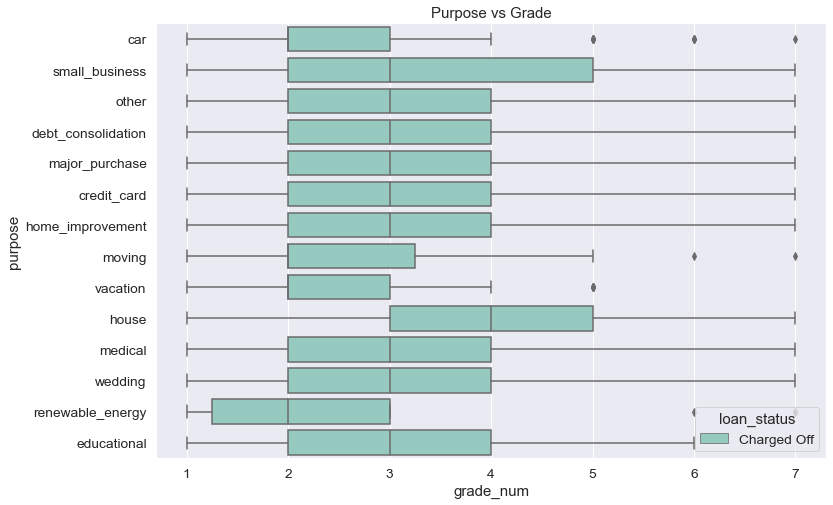

In [89]:
# Purpose vs Grade
plot_box_multi_var(loans_defaulted, 'grade_num', 'purpose', 'loan_status', 'Purpose vs Grade', 12, 8)

Observe that loan grades B, C, D are at higher risk of being defaulted irrespective of the purpose

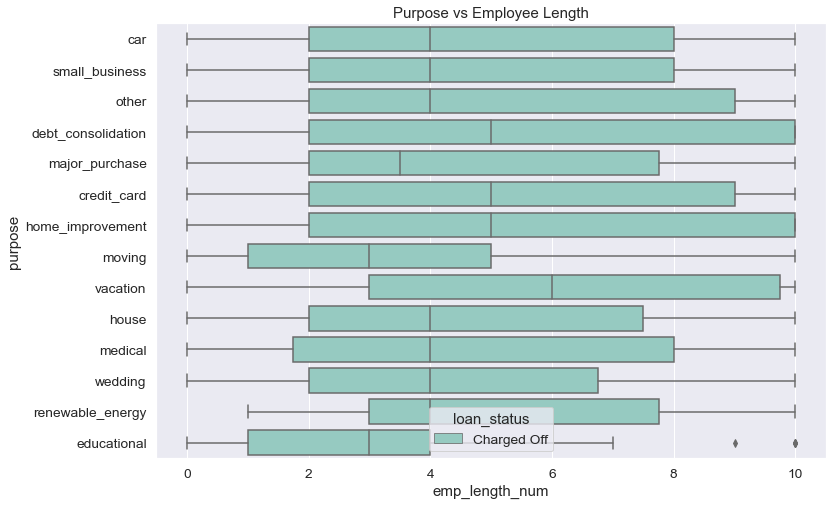

In [90]:
# Purpose vs Employee Length
plot_box_multi_var(loans_defaulted, 'emp_length_num', 'purpose', 'loan_status', 'Purpose vs Employee Length', 12, 8)

__Employee length of 3-6 years have higher risk of default__.

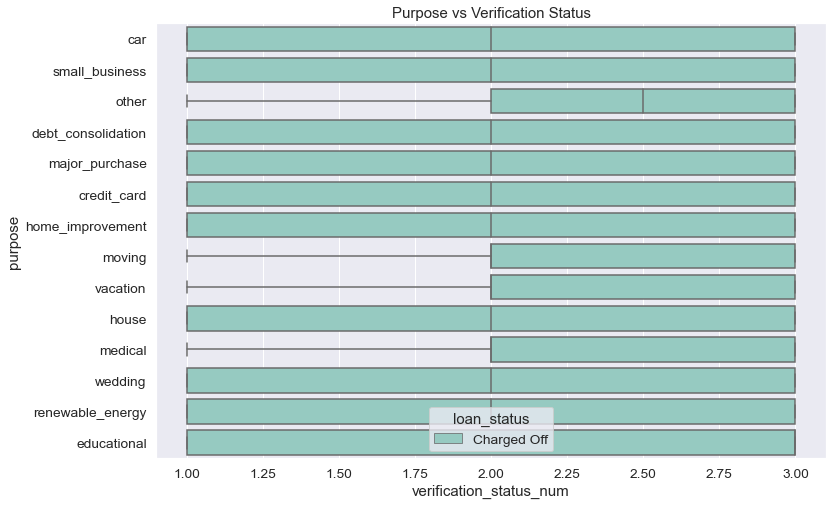

In [91]:
# Purpose vs Verification Status
plot_box_multi_var(loans_defaulted, 'verification_status_num', 'purpose', 'loan_status', 'Purpose vs Verification Status', 12, 8)

__Source Verified loan applications have higher risk of default irrespective of the purpose__.

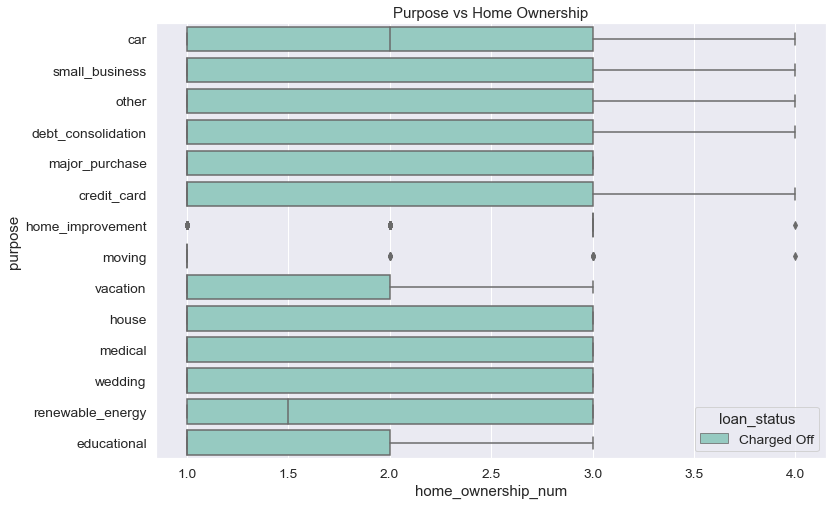

In [92]:
# Purpose vs Home Ownership
plot_box_multi_var(loans_defaulted, 'home_ownership_num', 'purpose', 'loan_status', 'Purpose vs Home Ownership', 12, 8)

No significant difference observed

### Observations 
- Though purpose variable showed strong impact against few variables, its impact is average on other variables.
- __Defaulted loan applicants annual income range is 30000 - 75000 dollars__
- __Defaulted loan amount range is 5000 to 19000 dollars__

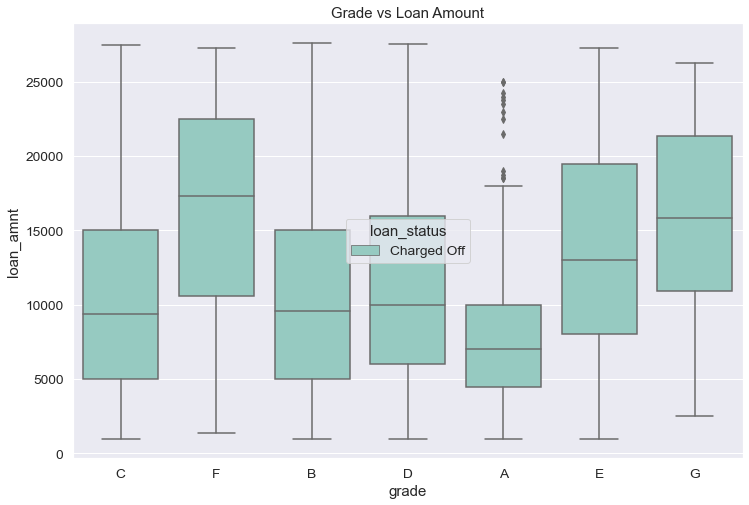

In [93]:
# Grade vs Loan Amount
plot_box_multi_var(loans_defaulted, 'grade', 'loan_amnt', 'loan_status', 'Grade vs Loan Amount', 12, 8)

- __Loan grades E, F, G have higher default rate__
- __Observe that defaulted loan amount range is 4000 - 22500 dollars__

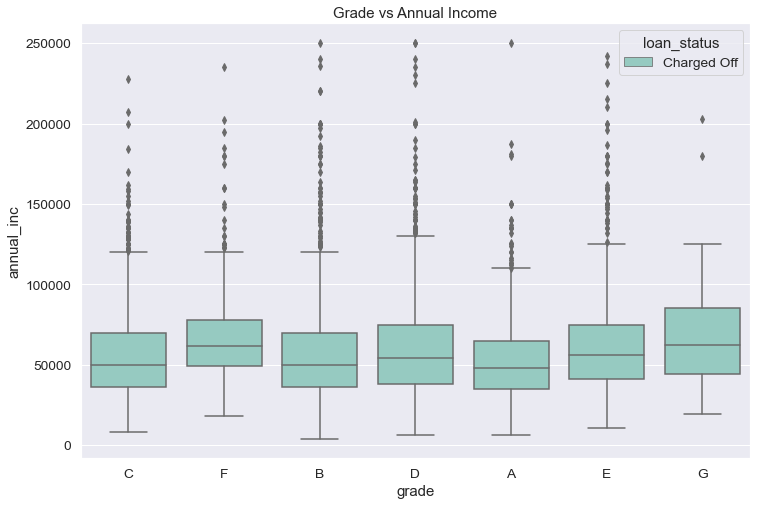

In [94]:
# Grade vs Annual Income
plot_box_multi_var(loans_defaulted, 'grade', 'annual_inc', 'loan_status', 'Grade vs Annual Income', 12, 8)

- Result is not very significant
- __Observe that annual income range for all defaults is 30000 - 80000 dollars__

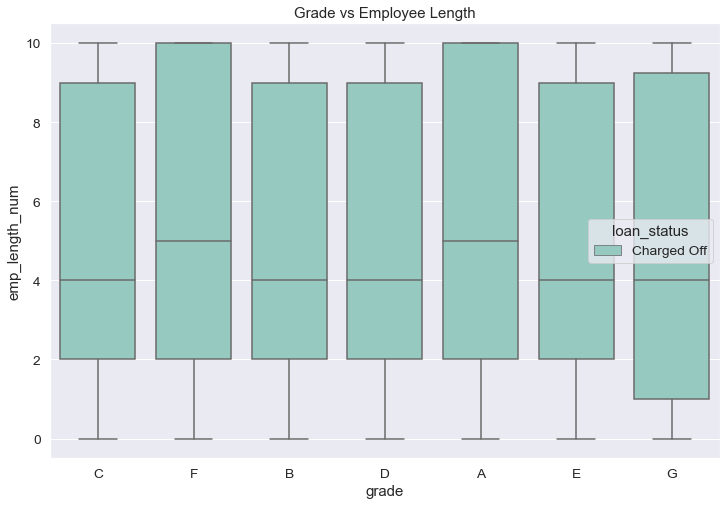

In [95]:
# Grade vs Employee Length
plot_box_multi_var(loans_defaulted, 'grade', 'emp_length_num', 'loan_status', 'Grade vs Employee Length', 12, 8)

__Employee Length range of 4 - 5 has higher default rates__

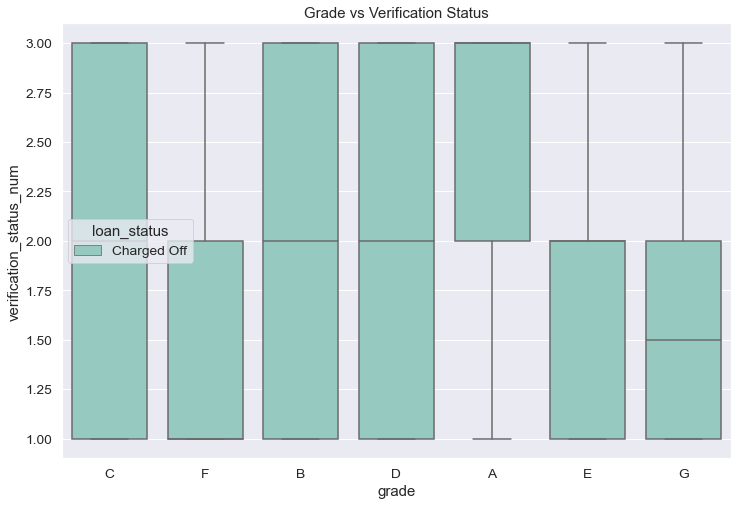

In [96]:
# Grade vs Verification Status
plot_box_multi_var(loans_defaulted, 'grade', 'verification_status_num', 'loan_status', 'Grade vs Verification Status', 12, 8)

__Source Verified status has higher default rates across all grades__

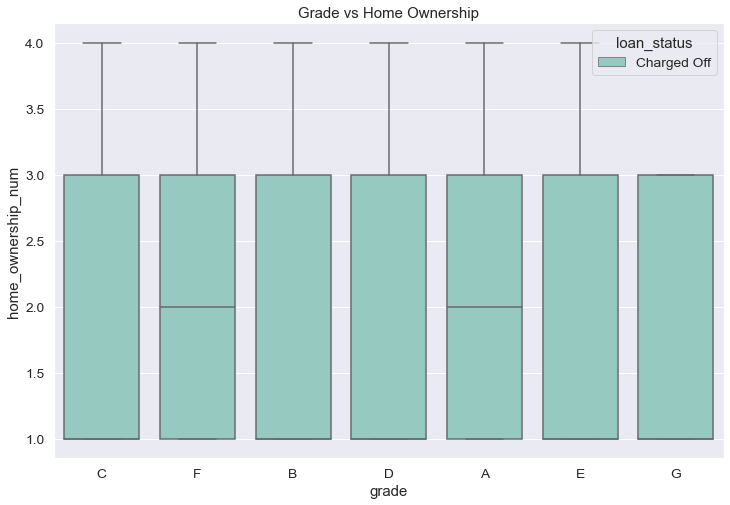

In [97]:
# Grade vs Home Ownership
plot_box_multi_var(loans_defaulted, 'grade', 'home_ownership_num', 'loan_status', 'Grade vs Home Ownership', 12, 8)

__"Rent" home ownership category has higher default rates__

### Observations
- __Grade has impact on several other variables. Hence, this can be a potential driver for identifying bad loans__
- __Defaulted loan applicants annual income range is 30000 - 80000 dollars__
- __Defaulted loan amount range is 4000 to 22500 dollars__

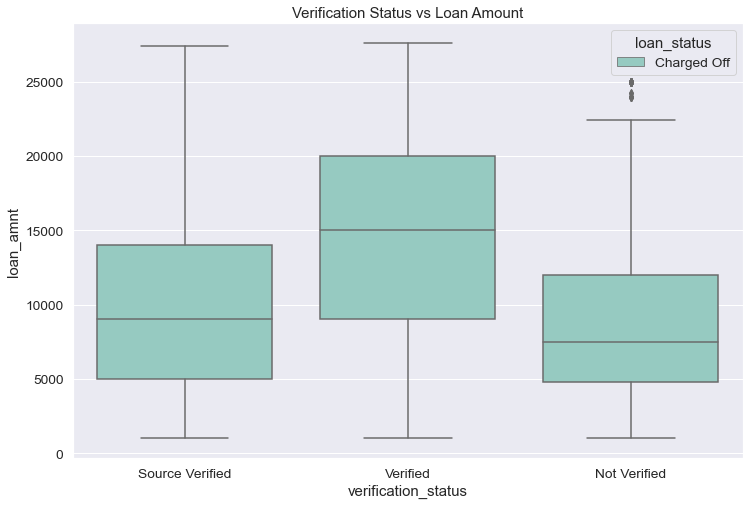

In [98]:
# Verification Status vs Loan Amount
plot_box_multi_var(loans_defaulted, 'verification_status', 'loan_amnt', 'loan_status', 'Verification Status vs Loan Amount', 12, 8)

- Interestingly, __Verified loans are at higher risk of default__.
- Source Verified and Not Verified loans are similar
- __Observe that defaulted loan amount range is 5000 to 20000 dollars__

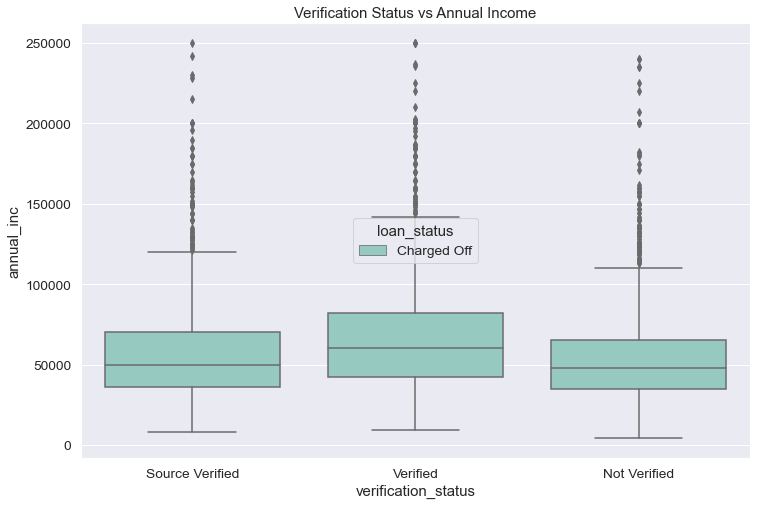

In [99]:
# Verification Status vs Annual Income
plot_box_multi_var(loans_defaulted, 'verification_status', 'annual_inc', 'loan_status', 'Verification Status vs Annual Income', 12, 8)

- No significant trends observed
- __Observe that defaulted loan applicants annual income range is 30000 to 80000 dollars__.

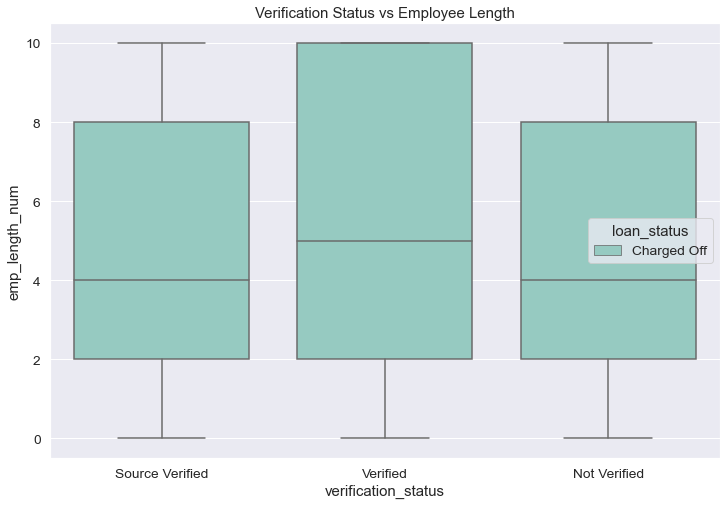

In [100]:
# Verification Status vs Employee Length
plot_box_multi_var(loans_defaulted, 'verification_status', 'emp_length_num', 'loan_status', 'Verification Status vs Employee Length', 12, 8)

__Employee length of 4 - 6 years are at higher risk of default__

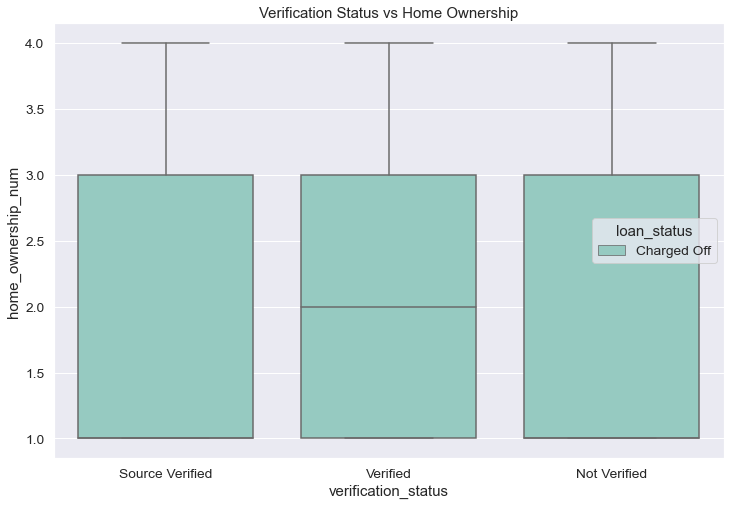

In [101]:
# Verification Status vs Home Ownership
plot_box_multi_var(loans_defaulted, 'verification_status', 'home_ownership_num', 'loan_status', 'Verification Status vs Home Ownership', 12, 8)

__"Rent" home ownership category are at higher risk of defaulting__.

### Observations
- Verification Status has significant impact on other variables. Hence, this can be one of the driving factors to identify bad loans.
- Defaulted loan applicants annual income range is 30000 - 80000 dollars
- Defaulted loan amount range is 5000 to 20000 dollars
- "Rent" category of home ownership has highest risk of defaulting

# Conclusions
The top driving factors that can identify potential loan defaulters are:
- __Grade__ - E, F, G loan grades with respect to loan amount and B, C, D loan grades with respect to loan purpose
- __Term__ - Higher the term, higher the risk of a loan becoming default except with respect to verification status
- __Annual Income__ - All defaulted loan applicants have annual income in the range of 30000 - 80000 dollars
- __Loan Amount__ - All defaulted loan applicants have sanctioned loan amount in the range of 5000 - 22500 dollars
- __Home Ownership__ - Most of the defaulted loan applicants are living on "Rent"
- __Verification Status__ - Most of the defaulted loan applicants have "Verified" and "Source Verified" status

# Recommendations
- Since Verification Status is one of the driving factors, ___ensure___ that the loan applicant's ___income and the source of income are thoroughly verified___
- Since loan applicants living on "Rent" are already paying significant amount of their income towards their rent, try ___adding "Rent" as a debt while calculating the debt-to-income ratio___
- Since lower loan amounts are at high risk of being defaulted, be a little ___stringent on the "purpose" of loan___. Avoid giving loans for Debt Consolidation and Small Business. For all purposes, ___give loans if loan applicant's annual income is higher than 80000 dollars___
- Try to have ___multiple and flexible loan payment term___ options - in the range of 24 months to 60 months
- Even if a loan has good grades assigned to it, ___bad purpose of the loan might push a loan to default___.